In [1]:
import pandas as pd
basketball = pd.read_csv('https://raw.githubusercontent.com/evapanizo/IronHack-Data-Module-2/master/27.-Network-Analysis/data/us_mens_basketball.csv', sep=',')

In [2]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [3]:
#!pip install networkx

In [5]:
#!pip install python-louvain

  Created wheel for python-louvain: filename=python_louvain-0.14-py3-none-any.whl size=9294 sha256=e461b62df55f8d5be70b2ebd1eb7c4db8c7c7d58e651d4f808caae075a5395d6
  Stored in directory: c:\users\victo\appdata\local\pip\cache\wheels\be\2d\1f\87004485ec41ab6f625f9320fd23d4755f2d7fe8cbc60d85dd
Successfully built python-louvain


In [6]:
# pip install networkx
import networkx as nx
# pip install python-louvin
import community
import pandas as pd

# 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

In [7]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [25]:
basketball[['Games','Name']].merge(basketball[['Games','Name']],on=['Games'])
#Faz a mesma coisa q a funçao na linha abaixo.

,Games,Name_x,Name_y
0,2000 Summer,Julius Shareef Abdur-Rahim,Julius Shareef Abdur-Rahim
1,2000 Summer,Julius Shareef Abdur-Rahim,Walter Ray Allen
2,2000 Summer,Julius Shareef Abdur-Rahim,"Vincent Lamont ""Vin"" Baker"
3,2000 Summer,Julius Shareef Abdur-Rahim,"Vincent Lamar ""Vince"" Carter"
4,2000 Summer,Julius Shareef Abdur-Rahim,Kevin Maurice Garnett
...,...,...,...
2743,1956 Summer,"James Patrick ""Jim"" Walsh","Robert Eugene ""Bob"" Jeangerard"
2744,1956 Summer,"James Patrick ""Jim"" Walsh",K. C. Jones
2745,1956 Summer,"James Patrick ""Jim"" Walsh","William Fenton ""Bill"" Russell"
2746,1956 Summer,"James Patrick ""Jim"" Walsh","Ronald Paul ""Ron"" Tomsic"


In [8]:
def df_to_graph(df, entity, edge):
    ''' Transform a dataframe into another dataframe suitable to work with graphs.'''
    graph_df = pd.merge(df, df, how='inner', on=edge)
    graph_df = graph_df.groupby([f'{entity}_x', f'{entity}_y']).count().reset_index()
    graph_df = graph_df.query(f'{entity}_x != {entity}_y')

    if type(edge) == list:
        graph_df = graph_df.loc[:, [entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df.loc[:, [entity + '_x', entity + '_y', edge]]
    
    return graph_df.rename(columns={f'{entity}_x':f'{entity}_src', 
                                    f'{entity}_y':f'{entity}_dest'})



In [32]:
df_graph=df_to_graph(basketball,'Name','Games')
df_graph

,Name_src,Name_dest,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1
...,...,...,...
2654,"Wilmer Frederick ""Bill"" Hosket",John Richard Clawson,1
2655,"Wilmer Frederick ""Bill"" Hosket","Joseph Henry ""Jo-Jo"" White",1
2656,"Wilmer Frederick ""Bill"" Hosket","Michael Barnwell ""Mike"" Silliman",1
2657,"Wilmer Frederick ""Bill"" Hosket","Michael Thomas ""Mike"" Barrett",1


# 2. Use the from_pandas_edgelist method to turn the data frame into a graph.

In [35]:
G=nx.from_pandas_edgelist(df_graph,'Name_src','Name_dest')

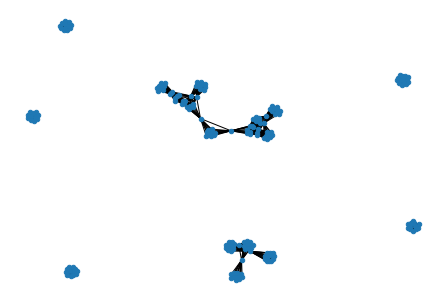

In [38]:
nx.draw(G, node_size=20)

# 3. Compute and print the following graph statistics for the graph:¶


* Number of nodes
* Number of edges
* Average degree
* Density

# 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

# 5. Compute PageRank centrality for the graph and print the top 5 nodes with the highest centrality.

# 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.¶


# 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

Look for nx.draw_kamada_kawai for reference. 


# 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

nx.ego_graph will help you visualize a graph centered at some node.

# 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.
